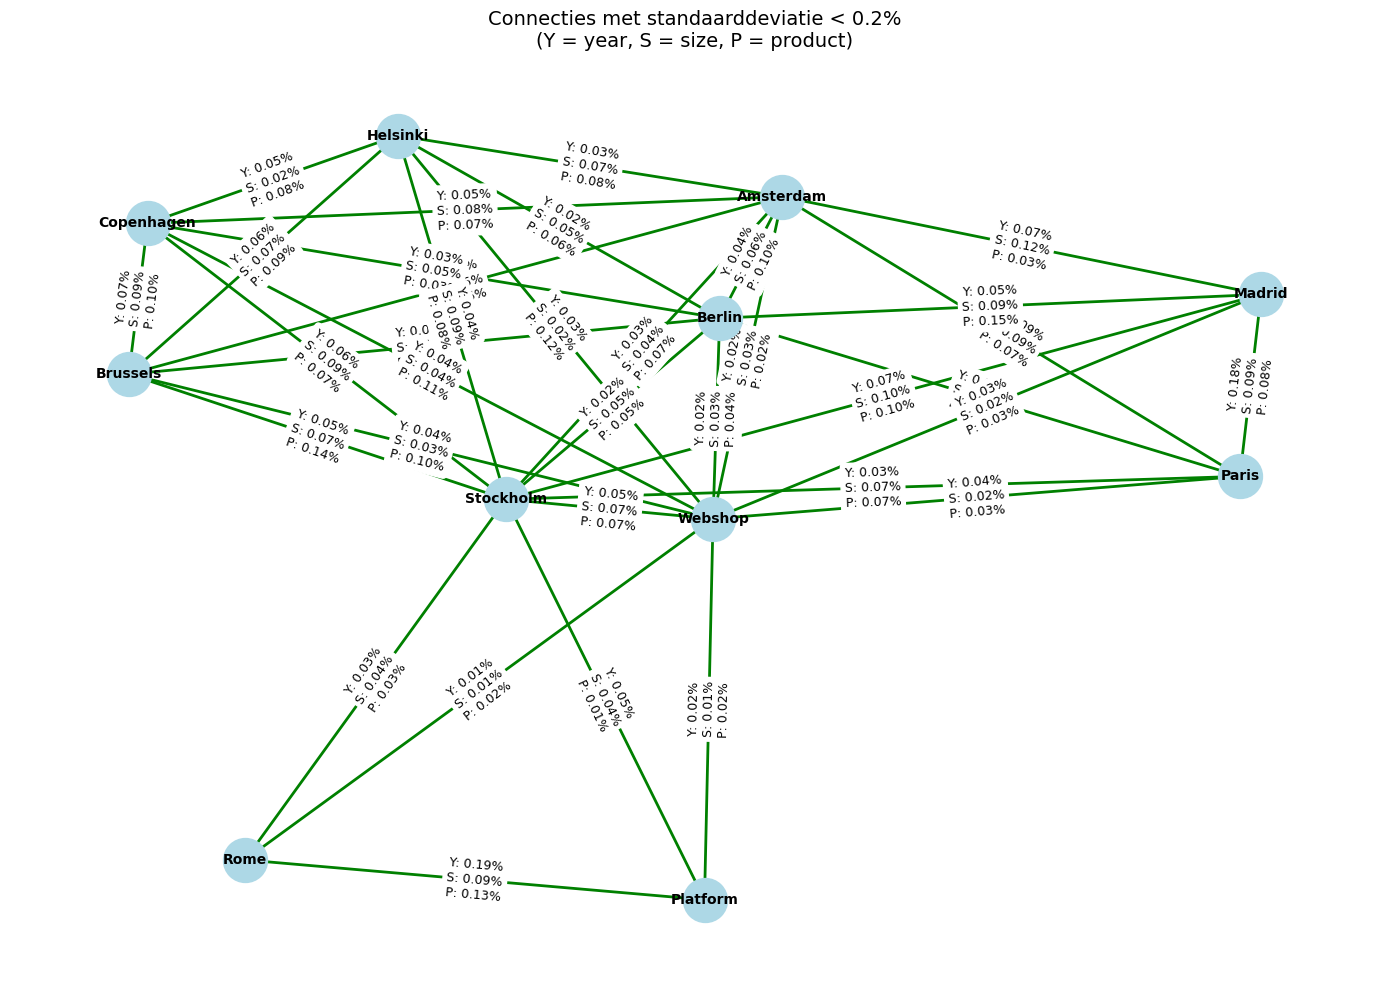

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === PAD NAAR JOUW BESTAND (pas dit aan!) ===
file_path = "/Users/biekeleenknegt/Desktop/Real Demandan.xlsx"  # <-- Zet hier jouw pad!
sheet_name = "DATA"
std_dev_threshold = .2  # hier kun je mee spelen

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered = df[
    (df['Standard Deviation per year'] < std_dev_threshold) &
    (df['Standard Deviation per size'] < std_dev_threshold) &
    (df['Standard Deviation per product'] < std_dev_threshold)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Standard Deviation per year']:.2f}%\n"
        f"S: {row['Standard Deviation per size']:.2f}%\n"
        f"P: {row['Standard Deviation per product']:.2f}%"
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold}%\n(Y = year, S = size, P = product)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
